# Exercise 2
*Divide your data set into two parts. One would be employed as test set, while the other would be employed as learning set.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns

sys.path.insert(0, "./..")

from utils import pca

In [2]:
col_names = [f"x{i}" for i in range(20)]
df = pd.read_table("data/data_kPCA_2022-2023.txt", delimiter=' ', names=col_names)
labels = pd.read_table("data/labels_kPCA_2022-2023.txt", delimiter=' ', names=['label'])
df = pd.concat([df,labels], axis=1)
df.head(10)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,label
0,0.048440,-0.605728,-0.806455,-0.089039,-0.173785,2.076301,0.313622,-0.060463,0.058880,0.221737,...,0.030232,0.077055,0.910828,-0.005463,-0.748908,-0.472695,-0.372555,0.265450,0.495448,1
1,-0.295462,-0.022271,-0.156778,-0.186206,1.065956,-0.109448,0.660369,-0.337726,1.062067,-0.201562,...,-1.074720,0.499960,-0.328338,-0.046867,-0.322455,-0.268781,-0.601436,1.261508,-0.976030,0
2,0.907188,-0.641413,0.376778,-0.059500,0.579425,-0.771757,0.400979,0.096620,0.000697,1.569824,...,0.094161,0.959419,0.047134,-0.527203,-0.117238,-0.699726,0.442404,0.395835,-0.600845,0
3,0.780795,0.290714,0.536952,0.029201,-0.072487,0.435681,-0.570775,0.804292,-0.429733,-1.330242,...,0.434869,0.020344,-0.692591,-0.448373,0.550437,0.655933,0.739303,-0.415398,-0.784031,0
4,0.441323,-0.433679,0.067781,-0.621546,0.419723,-0.957915,0.338285,0.014053,-0.010859,0.756259,...,-0.027585,0.959982,0.001654,-0.548821,-0.119099,-0.802109,1.094712,-1.142502,0.702591,0
5,-0.065164,-0.040561,-0.669958,-0.040982,-0.699678,-0.325913,-0.128257,0.097608,0.686576,1.120796,...,0.011008,-0.267033,-0.944402,0.905137,-1.111122,-0.213749,1.222356,0.202653,-0.307991,0
6,0.056646,0.410302,0.056863,-0.323346,-0.261563,1.724000,0.264337,0.119102,-0.454987,1.114121,...,-0.772304,-0.388000,1.100194,0.081941,0.235535,-0.466863,-0.224178,-0.000573,0.096640,1
7,-0.736735,-0.148512,-0.075388,0.572474,0.675302,0.642757,-0.311563,-0.224402,0.622451,0.200635,...,0.048083,0.031853,0.103544,-0.372252,1.179770,-0.446190,0.742163,-0.646883,0.107995,0
8,-0.481976,-0.025659,0.150840,0.813668,0.171317,0.663545,0.501602,0.258359,0.597251,0.329638,...,-0.457942,-0.365414,1.002387,-0.727236,1.126941,-0.217852,0.798470,0.201119,-0.024589,0
9,-0.607208,-0.522803,0.308843,0.358578,0.836118,-0.107347,0.073622,0.398357,-0.216316,0.694409,...,-0.444841,0.200321,0.315959,-0.316035,0.724769,0.450792,1.453086,-0.416107,-1.342363,0


*Use the program from the previous exercise for computing the Principal Components Analysis on the learning data set. Obtain and plot the eigenvalue spectrum. Project the data in the two first PCs and color it by label.*

In [3]:
class_column=df["label"]
df = df.subtract(df.mean(numeric_only=True))
df = df.divide(df.std())
df["label"]= class_column
df.head(10)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,label
0,0.084791,-1.071342,-1.569992,-0.193737,-0.298711,3.498310,0.506611,-0.085835,0.098140,0.299454,...,0.049702,0.143592,1.600421,-0.008760,-1.264525,-0.756445,-0.543820,0.409487,0.802042,1
1,-0.517182,-0.039390,-0.305213,-0.405162,1.832227,-0.184407,1.066733,-0.479440,1.770250,-0.272209,...,-1.766851,0.931681,-0.576925,-0.075158,-0.544463,-0.430125,-0.877919,1.946019,-1.580019,0
2,1.587961,-1.134458,0.733504,-0.129465,0.995950,-1.300315,0.647725,0.137163,0.001162,2.120041,...,0.154802,1.787889,0.082819,-0.845451,-0.197956,-1.119759,0.645779,0.610620,-0.972661,0
3,1.366720,0.514182,1.045329,0.063537,-0.124596,0.734069,-0.922006,1.141782,-0.716277,-1.796487,...,0.714929,0.037911,-1.216954,-0.719035,0.929409,1.049678,1.079165,-0.640798,-1.269208,0
4,0.772502,-0.767042,0.131955,-1.352407,0.721445,-1.613969,0.546451,0.019950,-0.018100,1.021325,...,-0.045349,1.788939,0.002906,-0.880119,-0.201097,-1.283601,1.597957,-1.762440,1.137370,0
5,-0.114065,-0.071740,-1.304262,-0.089171,-1.202647,-0.549123,-0.207180,0.138565,1.144383,1.513630,...,0.018097,-0.497619,-1.659413,1.451527,-1.876120,-0.342059,1.784281,0.312616,-0.498584,0
6,0.099155,0.725696,0.110700,-0.703562,-0.449590,2.904728,0.426999,0.169078,-0.758371,1.504616,...,-1.269675,-0.723043,1.933157,0.131405,0.397698,-0.747113,-0.327234,-0.000885,0.156444,1
7,-1.289597,-0.262671,-0.146764,1.245631,1.160748,1.082966,-0.503286,-0.318564,1.037499,0.270957,...,0.079049,0.059359,0.181938,-0.596964,1.992031,-0.714030,1.083340,-0.997891,0.174825,0
8,-0.843661,-0.045383,0.293653,1.770440,0.294470,1.117991,0.810267,0.366769,0.995495,0.445175,...,-0.752862,-0.680953,1.761300,-1.166235,1.902830,-0.348625,1.165532,0.310249,-0.039805,0
9,-1.062869,-0.924675,0.601250,0.780221,1.437168,-0.180866,0.118926,0.565513,-0.360554,0.937796,...,-0.731323,0.373301,0.555174,-0.506811,1.223766,0.721394,2.121079,-0.641892,-2.173047,0


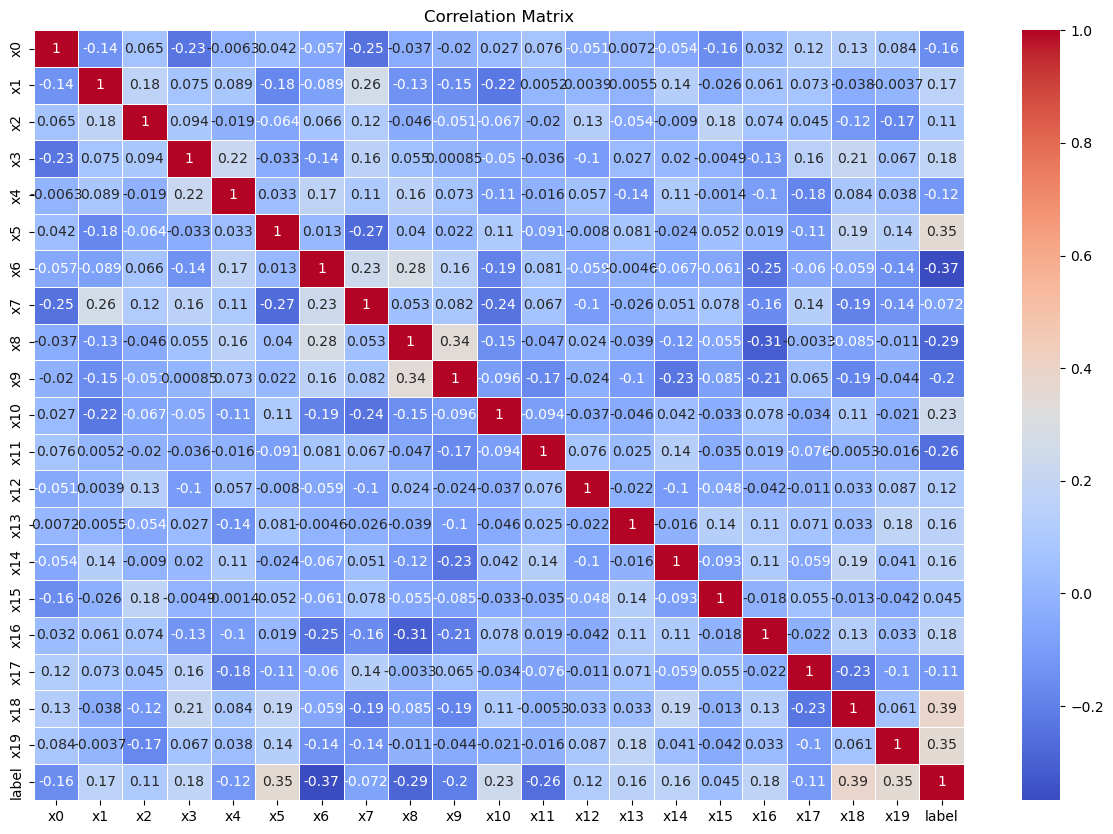

In [4]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Different variables are not correlated, hence a preliminary reduction is not possible

In [5]:
msk = np.random.rand(len(df)) < 0.8
train_set = df[msk]
test_set = df[~msk]

In [6]:
X_train = train_set.drop("label", axis=1)
X_train_arr = X_train.values
Y_train_arr = train_set["label"].values

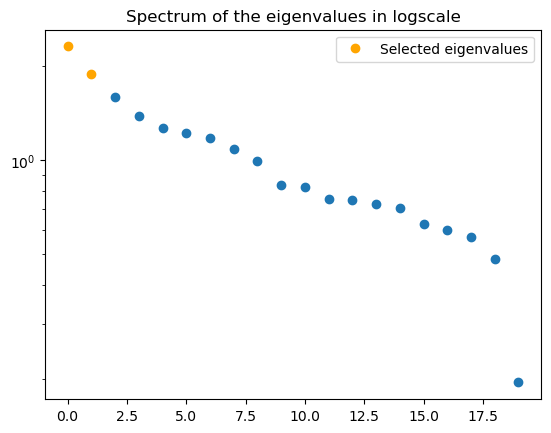

In [7]:
transformed_train_data, pca_components=pca(X_train_arr, n_components=2, plot_spectrum=True)

In [8]:
transformed_train_df = pd.DataFrame(transformed_train_data, columns=["f1", "f2"])
transformed_train_df = transformed_train_df.assign(label=train_set["label"].tolist())
transformed_train_df.head(10)

,f1,f2,label
0,0.654466,1.431352,0
1,-0.663561,-1.852710,0
2,1.972889,0.936216,0
3,0.968894,0.742299,0
4,-0.730580,1.355177,1
5,1.742128,0.090220,0
6,-2.771523,-1.270272,1
7,2.600154,0.245119,0
8,-2.115556,-0.712800,1
9,-1.302712,-2.255702,1


In [9]:
transformed_train_df["label"].unique()

array([0, 1])

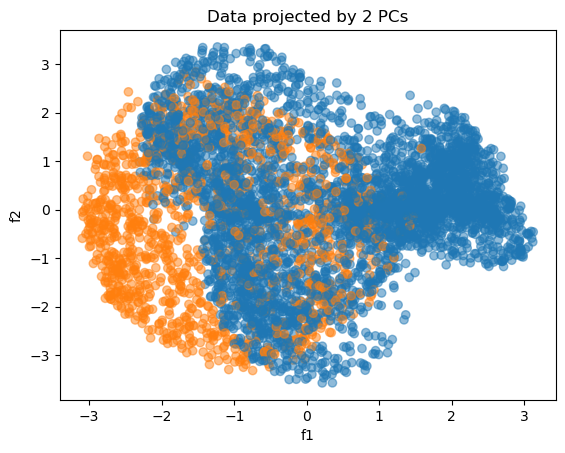

In [10]:
plt.figure()
plt.title('Data projected by 2 PCs')
colors = {0:'tab:blue', 1:'tab:orange'}
plt.scatter(transformed_train_df['f1'], transformed_train_df['f2'], c=transformed_train_df['label'].map(colors), alpha=0.5)
plt.xlabel("f1")
plt.ylabel("f2")
plt.show()

*For an increasing number of principal components (from 1 to 20):* 
- *Apply a logistic regression (you can program it yourself or use an external library) for learning a model in the learning data set.*
- *Transform the coordinates of the test data set with the matrix learned from the learning data set and make a prediction based on the logistic model. Quantify the quality of the prediction by computing the Mutual Information between the ground truth classification and the predicted labels.*

In [11]:
from sklearn.linear_model import LogisticRegression
from utils import normalized_mutual_information

In [12]:
X_test = test_set.drop("label", axis=1)
X_test_arr = X_test.values
Y_test_arr = test_set["label"].values

In [13]:
nmi_arr = np.arange(20)

for i in range(20):
    
    transformed_train_data, pca_components=pca(X_train_arr, n_components=i+1)
    logreg=LogisticRegression()
    logreg.fit(transformed_train_data, Y_train_arr)

    transformed_test_data = np.dot(X_test_arr, pca_components)
    y_pred = logreg.predict(transformed_test_data)
    nmi = normalized_mutual_information(Y_test_arr, y_pred, 2)
    print(f"Normalized Mutual Information with {i+1} principal components: {nmi}\n")
    nmi_arr = np.append(nmi_arr, nmi)


Normalized Mutual Information with 1 principal components: 0.07139757896368316

Normalized Mutual Information with 2 principal components: 0.10192816017217962

Normalized Mutual Information with 3 principal components: 0.1622272183840248

Normalized Mutual Information with 4 principal components: 0.2272676331788454

Normalized Mutual Information with 5 principal components: 0.22949402704340252

Normalized Mutual Information with 6 principal components: 0.2445023349281221

Normalized Mutual Information with 7 principal components: 0.24093429739672162

Normalized Mutual Information with 8 principal components: 0.2595271187975251

Normalized Mutual Information with 9 principal components: 0.26567617502971635



Normalized Mutual Information with 10 principal components: 0.26567617502971635

Normalized Mutual Information with 11 principal components: 0.3291446047601554

Normalized Mutual Information with 12 principal components: 0.3292761447788276

Normalized Mutual Information with 13 principal components: 0.3341703249781321

Normalized Mutual Information with 14 principal components: 0.3755899168465971

Normalized Mutual Information with 15 principal components: 0.38506359800484774

Normalized Mutual Information with 16 principal components: 0.43341339958389713

Normalized Mutual Information with 17 principal components: 0.43052104723930884

Normalized Mutual Information with 18 principal components: 0.43930169452763257

Normalized Mutual Information with 19 principal components: 0.4483324239313895

Normalized Mutual Information with 20 principal components: 0.4483324239313895



*Repeat points 3. and 4. but using the kernel-PCA with a Gaussian kernel. Test widths between 0.05 and 2.0. In this case, perform directly the transformation in the whole data set at the beginning.*

In [14]:
from utils import k_pca

In [15]:
sigma_list = [0.25, 0.5, 1.0, 2.0]

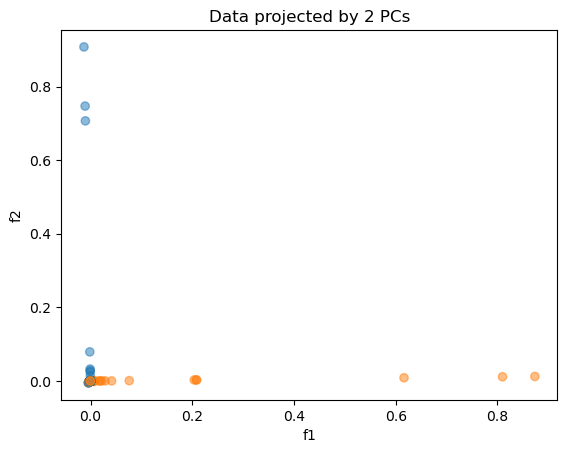

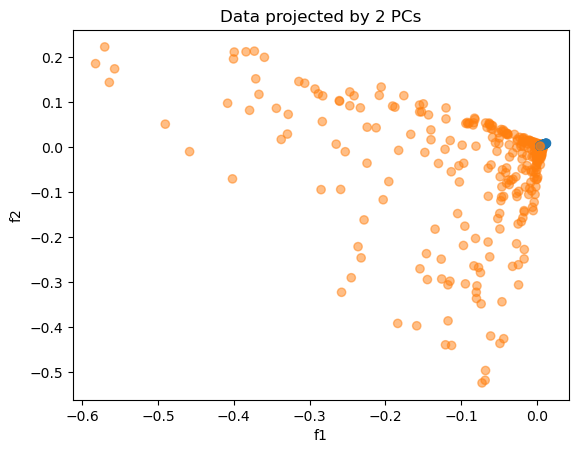

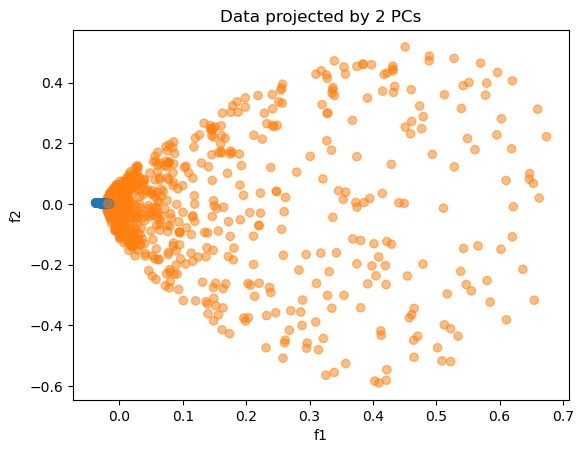

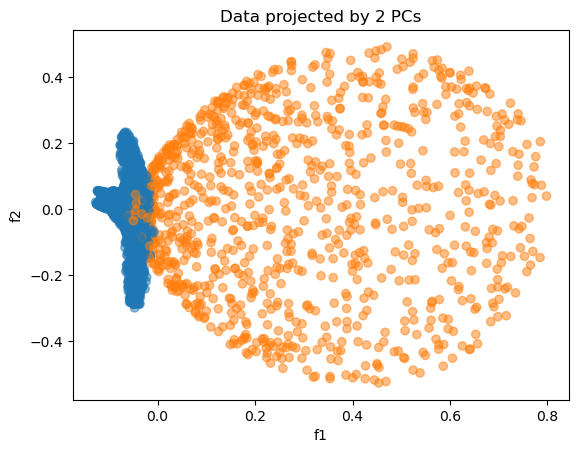

In [16]:
for sigma in sigma_list:

    transformed_train_data = k_pca(X_train_arr, n_components=2, sigma=sigma)
    transformed_train_df = pd.DataFrame(transformed_train_data, columns=["f1", "f2"])
    transformed_train_df = transformed_train_df.assign(label=train_set["label"].tolist())

    plt.figure()
    plt.title('Data projected by 2 PCs')
    colors = {0:'tab:blue', 1:'tab:orange'}
    plt.scatter(transformed_train_df['f1'], transformed_train_df['f2'], c=transformed_train_df['label'].map(colors), alpha=0.5)
    plt.xlabel("f1")
    plt.ylabel("f2")
    plt.show()

Try for different number of components

In [20]:
train_size = int(X_train_arr.shape[0]*0.8)

In [21]:

nmi_arr_kernel = np.arange(20)

for i in range(20):
    transformed_data = k_pca(X_train_arr, n_components=i+1, sigma=2.0)
    msk = np.random.rand(len(df)) < 0.8
    train_set = transformed_data[:train_size]
    test_set = transformed_data[train_size:]
    train_labels = Y_train_arr[:train_size]
    test_labels = Y_train_arr[train_size:]
    logreg=LogisticRegression()
    logreg.fit(train_set, train_labels)
    y_pred = logreg.predict(test_set)
    nmi = normalized_mutual_information(test_labels, y_pred, 2)
    print(f"Normalized Mutual Information with {i+1} principal components: {nmi}\n")
    nmi_arr_kernel = np.append(nmi_arr_kernel, nmi)


Normalized Mutual Information with 1 principal components: 0.24169624018838276



: 

: 